## Notation

Suppose we have two groups: the treatment group and the sham (control) group.
- $\overline{Y}_1$ is the average treatment - control for the exposed group
- $\overline{Y}_0$ is the average treatment - control for the sham group
- the treatment group has $n_1 := np$ subjects
- the sham group has $n_0 := n(1-p)$ subjects
- the treatment group has variance $\sigma_1^2 / n_1 = \sigma_1^2 / (np)$
- the sham group has variance $\sigma_0^2 / n_0 = \sigma_0^2 / (n(1-p))$
- the value of $p$ that minimizes the variance of a particular estimator is denoted $p^*$
## The estimator $T = \overline{Y_1} - \beta \,\overline{Y_0}$

In this case, we assume $\overline{Y}_1$ and $\overline{Y}_0$ are independent, and thus
$$
\operatorname{var}(T) = \operatorname{var}(\overline{Y}_1) + \beta^2 \operatorname{var}(\overline{Y}_0) = \frac{\sigma_1^2}{np} + \frac{\beta^2 \sigma_0^2}{n(1-p)}
$$
which we can minimize with respect to $p$:
$$
\frac{d}{dp} \operatorname{var}(T) = -\frac{\sigma_1^2}{np^2} + \frac{\beta^2 \sigma_0^2}{n(1-p)^2} = 0 \\
\implies p^* = \frac{\sigma_1}{\sigma_1 + \beta \sigma_0}.
$$
If $\beta = 1$ and $\sigma_0 = \sigma_1$, then we see $p^* = 1/2$. Also, if $\beta = 0$, which is just the exposed-only estimate, then $p^* = 1$.

## The estimator $T = \mathbb{E}[\theta \mid \overline{Y}_0, \overline{Y}_1]$ with known hyperparameters
### Theoretical Results

We make these assumptions:
- $\overline{Y}_1 \mid \theta, b \sim \mathcal{N}\left(\theta + b, \sigma_1^2 / (np) \right)$
- $\overline{Y}_0 \mid b \sim \mathcal{N}(b, \sigma_0^2 / (n (1 - p)))$
- $\theta \sim \mathcal{N}(\mu_\theta, \sigma_\theta^2)$
- $b \sim \mathcal{N}(\mu_b, \sigma_b^2)$
- $\sigma_0, \sigma_1, \mu_\theta, \sigma_\theta, \mu_b, \sigma_b$ are known constants 

One can show that
$$
\theta \mid \overline{Y}_0,\,\overline{Y}_1 \sim
\mathcal{N}\!\left(
\mathbb{E}\bigl[\theta\mid \overline{Y}_1,\overline{Y}_0\bigr],\;
\operatorname{var}(\theta \mid \overline{Y}_0, \overline{Y}_1)

\right)
$$
where:
$$
\mathbb{E}\bigl[\theta\mid \overline{Y}_1,\overline{Y}_0\bigr]
=
\frac{
  \displaystyle
  \Bigl(\frac{p\,n}{\sigma_1^2} + \frac{(1-p)\,n}{\sigma_0^2} + \frac{1}{\sigma_b^2}\Bigr)
  \Bigl(\frac{p\,n}{\sigma_1^2}\,\overline{Y}_1 + \frac{\mu_\theta}{\sigma_\theta^2}\Bigr)
  \;-\;
  \frac{p\,n}{\sigma_1^2}
  \Bigl(\frac{p\,n}{\sigma_1^2}\,\overline{Y}_1 + \frac{(1-p)\,n}{\sigma_0^2}\,\overline{Y}_0 + \frac{\mu_b}{\sigma_b^2}\Bigr)
}{
  \displaystyle
  \Bigl(\frac{p\,n}{\sigma_1^2} + \frac{1}{\sigma_\theta^2}\Bigr)
  \Bigl(\frac{p\,n}{\sigma_1^2} + \frac{(1-p)\,n}{\sigma_0^2} + \frac{1}{\sigma_b^2}\Bigr)
  \;-\;
  \Bigl(\frac{p\,n}{\sigma_1^2}\Bigr)^{\!2}
}\,.
$$
as well as
$$
\operatorname{var}(\theta \mid \overline{Y}_0, \overline{Y}_1) = \frac{
  \dfrac{p\,n}{\sigma_1^2} + \dfrac{(1-p)\,n}{\sigma_0^2} + \dfrac{1}{\sigma_b^2}
}{
  \Bigl(\dfrac{p\,n}{\sigma_1^2} + \dfrac{1}{\sigma_\theta^2}\Bigr)
  \Bigl(\dfrac{p\,n}{\sigma_1^2} + \dfrac{(1-p)\,n}{\sigma_0^2} + \dfrac{1}{\sigma_b^2}\Bigr)
  \;-\;
  \Bigl(\dfrac{p\,n}{\sigma_1^2}\Bigr)^2
}.
$$
Minimizing this yields the optimal ratio
$$
p^* \;=\; \min\left\{ 1,\; \left( 1 + \dfrac{\sigma_0^2}{n\,\sigma_b^2} \right) \middle/
             \left( 1 + \dfrac{\sigma_0}{\sigma_1} \right) \right\}.
$$
We note that if $n \,\sigma_b^2 \leq \sigma_0 \, \sigma_1$, then we should allocate all subjects (except possibly one) to the treatment group to minimize the posterior variance of $\theta$. However, this only applies in the event that the hyperparameters $\mu_\theta, \sigma_\theta, \mu_b, \sigma_b$ are all known constants.

### Confirming with simulations

The above model assumes we know the hyperparameters `mu_theta`, `sigma_theta`, `mu_b`, `sigma_b` (as well as `sigma0` and `sigma1`, but for now we assume those are always known). However, in practice, we would not know the hyperparameters and thus would instead fit a model where they instead have some prior over them. This gives us two Stan models: one with the hyperparameters known and another where the hyperparameters are given flat priors. See below for the Stan files.

In [1]:
# this just adds my simulation package to the path
import sys
import os

sys.path.append("../")
adaptive_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if adaptive_root not in sys.path:
    sys.path.append(adaptive_root)

In [22]:
print("This is for the case where we know the hyperparameters:\n")
with open(os.path.join("..", "basic_mlm_hp.stan"), "r") as f:
    print(f.read())

This is for the case where we know the hyperparameters:

data {
    int<lower=1> J;
    vector[J] y1_bar;
    vector[J] y0_bar;
    vector<lower=0>[J] sigma_y1_bar;
    vector<lower=0>[J] sigma_y0_bar;
    array[J] int<lower=1, upper=J> j;

    // The following are the known hyperparameters
    real mu_theta;
    real<lower=0> sigma_theta;
    real mu_b;
    real<lower=0> sigma_b;
}
parameters {
    vector[J] theta;
    vector[J] b;
}
model {
    theta ~ normal(mu_theta, sigma_theta);
    b ~ normal(mu_b, sigma_b);

    y1_bar ~ normal(b + theta, sigma_y1_bar);
    y0_bar ~ normal(b, sigma_y0_bar);
}


In [23]:
print("And this is for the case where we don't know the hyperparameters:\n")
with open(os.path.join("..", "basic_mlm.stan"), "r") as f:
    print(f.read())

And this is for the case where we don't know the hyperparameters:

data {
    int<lower=1> J;
    vector[J] y1_bar;
    vector[J] y0_bar;
    vector<lower=0>[J] sigma_y1_bar;
    vector<lower=0>[J] sigma_y0_bar;
    array[J] int<lower=1, upper=J> j;
}
parameters {
    real mu_theta;
    real mu_b;
    real<lower=0> sigma_theta;
    real<lower=0> sigma_b;
    vector[J] eta_theta;
    vector[J] eta_b;
}
transformed parameters {
    vector[J] theta;
    vector[J] b;

    theta = mu_theta + sigma_theta * eta_theta;
    b = mu_b + sigma_b * eta_b;
}
model {
    eta_theta ~ normal(0, 1);
    eta_b ~ normal(0, 1);

    y1_bar ~ normal(b + theta, sigma_y1_bar);
    y0_bar ~ normal(b, sigma_y0_bar);
}


At the moment, we aim to verify that the posterior variance formula we derived is correct. For each value of `p` in `p_grid`, we simulate a *single* experiment based on the original chicken data. Then we fit using Stan and obtain samples of the $\theta$ from its posterior distribution. The variance of these samples is an estimate of the posterior variance. We repeat this `num_reps` times for each value of `p` and average the obtained variances for each `p`.

The below code gives us an `ExperimentSimulator` object for each value of `p` in `p_grid`. The values of the parameters are printed for two of the simulators.

In [27]:
import numpy as np
import copy
import pprint

from simulation import simulators
from simulation import fitters
from simulation import utils

p_grid = np.linspace(0.05, 0.95, 10)
num_reps = 3
sims = {}
for p in p_grid:
    sim = copy.deepcopy(utils.CHICK_SIMULATOR)
    sim.n = np.array([utils.CHICK_N])
    sim.p = np.array([p])
    sims[p] = sim

pprint.PrettyPrinter().pprint({p: sims[p].params for p in p_grid[3:5]})

{np.float64(0.35): {'mu_b': 0.004112476586286136,
                    'mu_theta': 0.09769112704348468,
                    'sigma0': 0.22627416997969524,
                    'sigma1': 0.22627416997969524,
                    'sigma_b': 0.0015924804430524674,
                    'sigma_theta': 0.056385519973983916},
 np.float64(0.44999999999999996): {'mu_b': 0.004112476586286136,
                                   'mu_theta': 0.09769112704348468,
                                   'sigma0': 0.22627416997969524,
                                   'sigma1': 0.22627416997969524,
                                   'sigma_b': 0.0015924804430524674,
                                   'sigma_theta': 0.056385519973983916}}


These hyperparameters were obtained by fitting the original chicken dataset to the same multilevel model using Stan, except that $\mu_\theta, \sigma_\theta, \mu_b, \sigma_b$ were given flat priors (see the above Stan file).

In [4]:
# stop annoying cmdstanpy logs

import logging

logger = logging.getLogger("cmdstanpy")
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [7]:
from tqdm.auto import tqdm
from cmdstanpy import CmdStanModel

mlm_basic = CmdStanModel(stan_file=os.path.join("..", "basic_mlm.stan"))
mlm_hyperparams = CmdStanModel(stan_file=os.path.join("..", "basic_mlm_hp.stan"))
fitter_basic = fitters.StanFitterBasic(mlm_basic)
fitter_hyperparams = fitters.StanFitterBasicWithHyperparams(mlm_hyperparams)

avg_variances = {"unknown hyperparameters": {}, "known hyperparameters": {}}

for p, sim in tqdm(sims.items(), desc="Simulator", leave=False):
    for kind in tqdm(avg_variances.keys(), desc="Type", leave=False):
        variances = []
        fitter = (
            fitter_basic if kind == "unknown hyperparameters" else fitter_hyperparams
        )

        for _ in tqdm(range(num_reps), desc="Repetitions", leave=False):
            expt = sim.simulate()
            result = fitter.fit(expt, show_progress=False)
            theta_variance = np.var(result.theta)
            variances.append(theta_variance)

        avg_variances[kind][p] = np.mean(variances)


Simulator:   0%|          | 0/10 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Type:   0%|          | 0/2 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

Repetitions:   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
def posterior_variance_theta(simulator: simulators.ExperimentSimulator) -> float:
    sigma1 = simulator.params["sigma1"]
    sigma0 = simulator.params["sigma0"]
    p = simulator.p[0]
    n = simulator.n[0]
    sigma_theta = simulator.params["sigma_theta"]
    sigma_b = simulator.params["sigma_b"]

    V1 = sigma1**2 / (p * n)
    V0 = sigma0**2 / ((1 - p) * n)

    A = 1.0 / V1 + 1.0 / (sigma_theta**2)
    B = 1.0 / V1 + 1.0 / V0 + 1.0 / (sigma_b**2)
    C = 1.0 / V1

    denom = A * B - C**2
    theta_post_var = B / denom

    return theta_post_var

In [11]:
theoretical_variances = {p: posterior_variance_theta(sims[p]) for p in p_grid}
avg_variances["theoretical"] = theoretical_variances

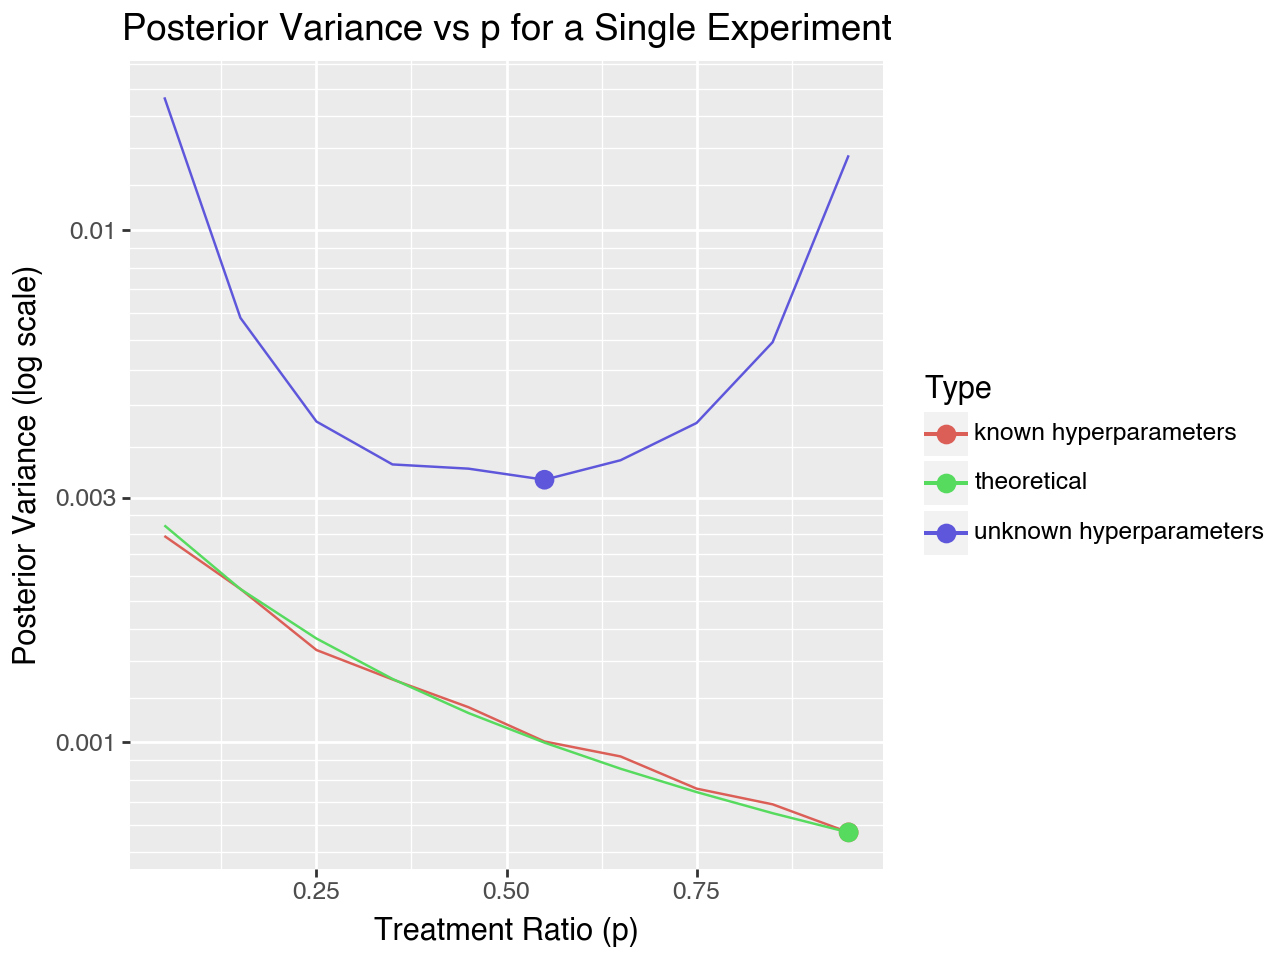

In [ ]:
import pandas as pd

from plotnine import (
    ggplot,
    aes,
    geom_line,
    geom_point,
    scale_y_log10,
    labs,
    theme_minimal,
)

# Flatten avg_variances into a DataFrame
df = pd.DataFrame(
    [
        {"type": kind, "p": float(p), "variance": float(var)}
        for kind, mapping in avg_variances.items()
        for p, var in mapping.items()
    ]
)

# Find the minimum‐variance point for each type
df_min = df.loc[df.groupby("type")["variance"].idxmin()]

# Build the plot
(
    ggplot(df, aes(x="p", y="variance", color="type"))
    + geom_line()
    + geom_point(data=df_min, mapping=aes(x="p", y="variance", color="type"), size=3)
    + scale_y_log10()
    + labs(
        x="Treatment Ratio (p)",
        y="Posterior Variance (log scale)",
        color="Type",
        title="Posterior Variance vs p for a Single Experiment",
    )
)

Each graph has a dot marking its minimum point. We see that the empirical posterior variance of $\theta$ is the same as the theoretical variance, provided we know the hyperparameters. Note that this is distinct from the posterior variance if we did *not* know the hyperparameters as the above graph shows.

## Can the optimal ratio be somewhere other than $p=0.5$?

Here is a major difficulty: in finding the optimal allocation $p^*$, we assumed we knew the hyperparameters. As the above graphs show, the theoretical result and the simulation match well *if the posterior mean is obtained using the correctly specified model*. The problem is that the unknown-hyperparameter model samples the posterior of $\theta$ with flat priors on the hyperparameters.

## Dealing with experiments $j=1,\ldots,J$

Now suppose that for each experiment $j$ we have the model from the chicken paper, with possibly different sample sizes $n_j$ and treatment ratios $p_j$:
- $\overline{Y}_{j1} \mid \theta_j, b_j \sim \mathcal{N}\left(\theta_j + b_j, \sigma_1^2 / (n_j p_j) \right)$
- $\overline{Y}_{j0} \mid b_j \sim \mathcal{N}(b_j, \sigma_0^2 / (n_j (1 - p_j)))$
- $\theta_j \sim \mathcal{N}(\mu_\theta, \sigma_\theta^2)$
- $b_j \sim \mathcal{N}(\mu_b, \sigma_b^2)$
- $\sigma_0, \sigma_1, \mu_\theta, \sigma_\theta, \mu_b, \sigma_b$ are known constants 

Since the hyperparameters are known, I believe the result should be the same as before:
$$
p^*_j \;=\; \min\left\{ 1,\; \left( 1 + \dfrac{\sigma_0^2}{n_j\,\sigma_b^2} \right) \middle/
             \left( 1 + \dfrac{\sigma_0}{\sigma_1} \right) \right\}.
$$

If $\sigma_0 = \sigma_1$, then we have
$$
p^*_j \;=\; \min\left\{ 1,\; \frac{1}{2}\left( 1 + \dfrac{\sigma_0^2}{n_j\,\sigma_b^2} \right)
             \right\}
$$
which is approximately $0.5$ if $\sigma_0^2 \ll n_j \sigma_b^2$. 
## What if the hyperparameters are unknown?

Now we assume $\mu_\theta, \sigma_\theta, \mu_b, \sigma_b$ are unknown, but we still know $\sigma_0$ and $\sigma_1$. Since we just need $\sigma_b$ to estimate $p_j^*$, we can try to find an estimator for $\sigma_b$ and plug in above to obtain an estimate for $p_j^*$. Note that
$$
\operatorname{cov}(\overline{Y}_{j0}, \overline{Y}_{j1}) = \operatorname{cov}(b_j + \text{noise}, \theta_j + b_j + \text{noise}) = \operatorname{var}(b_j) = \sigma_b^2
$$
Thus an estimator for $\sigma_b$ is
$$
\hat{\sigma_b} = \sqrt{\frac{1}{J - 1} \sum_{j=1}^J (\overline{Y}_{j0} - \overline{Y}_0)(\overline{Y}_{j1} - \overline{Y}_1)}
$$
where $\overline{Y}_0 := \frac{1}{J} \sum_{j=1}^J \overline{Y}_{j0}$ and likewise for $\overline{Y}_1$. This gives an estimator for $\hat{p}^*_j$:

$$ 
\hat{p}^*_j \;=\; \min\left\{ 1,\; \left( 1 + \dfrac{\sigma_0^2}{n_j\,\hat{\sigma_b}^2} \right) \middle/
             \left( 1 + \dfrac{\sigma_0}{\sigma_1} \right) \right\}.
$$

This suggests the following algorithm for reducing error in estimating each $\theta$:
- for the first experiment, set $p = 0.5$
- calculate $\hat{\sigma_b}$ based on all experimental data so far
- for each subsequent experiment, set $p = \hat{p}^*_j$ using our estimate $\hat{\sigma_b}$
- repeat the above two lines for the desired number of experiments.

In [16]:
utils.CHICK_SIGMA0**2 / (64 * utils.CHICK_SIGMA_B**2)

315.4581643898581